In [1]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay
import IPython.display as ipd


## 1. Reading the dataset

In [2]:
data = pd.read_csv("../input/dysarthria-detection/torgo_data/data.csv")

In [3]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [4]:
data["f"] = "../input/dysarthria-detection/"
data["filename"] = data["f"]+data["filename"]
del data["f"]

In [5]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...


## 2. Defining functions for 
* waveform
* spectogram
* zero crossing rate
* spectral centroid
* spectral rolloff
* mfcc
* mel spectogram

In [6]:
def waveform(file,is_dysarthria,gender):
    x , sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Waveplot of " +is_dysarthria+' ' +gender )
    librosa.display.waveshow(x, sr=sr)
    plt.show()
def Spectogram_of_log(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    
    plt.figure(figsize=(20, 5))
    plt.title("Specshow of " +is_dysarthria+' ' +gender )
    X = librosa.stft(x)
    
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show()
def Zero_crossing_rate(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title("Zero Crossing Rate of "  +is_dysarthria+' ' +gender )
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()
def Spectral_centroid(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Spectral Centroids of " +is_dysarthria+ ' '+gender )
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()
def Spectral_rolloff(file,is_dysarthria,gender):
    x, sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title("Spectral Rolloff of " +is_dysarthria+ ' '+gender )
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()
def mfcc(file,is_dysarthria,gender):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title("MFCC Spectral of "  +is_dysarthria+' ' +gender )
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()
def mel_Spectogram(file,is_dysarthria,gender):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title("Mel Spectrogram of "  +is_dysarthria+ ' '+gender )
    mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

def get_feature_plot(file,is_dysarthria,gender):
    waveform(file,is_dysarthria,gender)
    Spectogram_of_log(file,is_dysarthria,gender)
    Zero_crossing_rate(file,is_dysarthria,gender)
    Spectral_centroid(file,is_dysarthria,gender)
    Spectral_rolloff(file,is_dysarthria,gender)
    mel_Spectogram(file,is_dysarthria,gender)
    mfcc(file,is_dysarthria,gender)

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [7]:
data.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
1,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
2,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
3,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...
4,non_dysarthria,female,../input/dysarthria-detection/torgo_data/non_d...


#### Plots for Non dysarthria Female

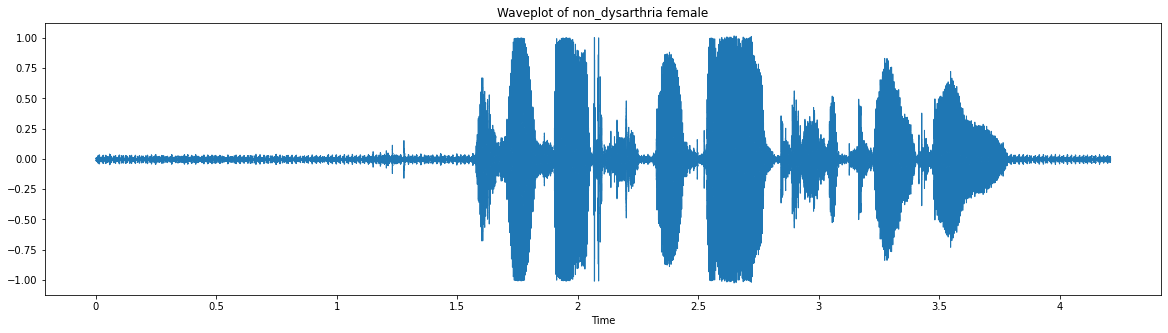

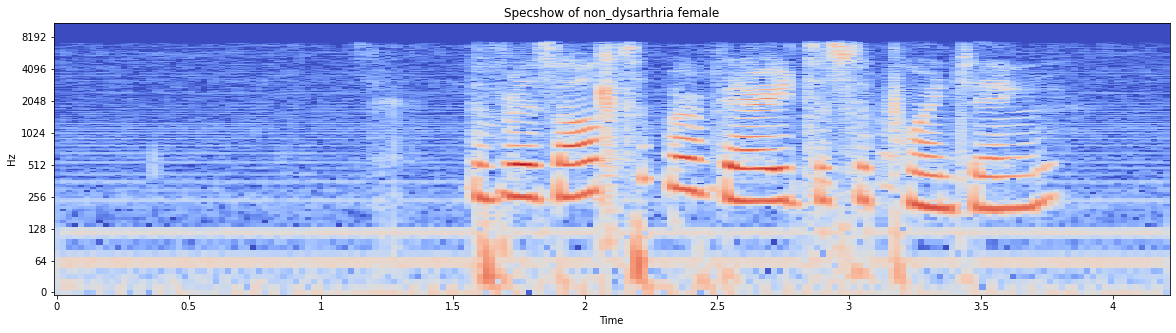

Sum of zero crossing  8730


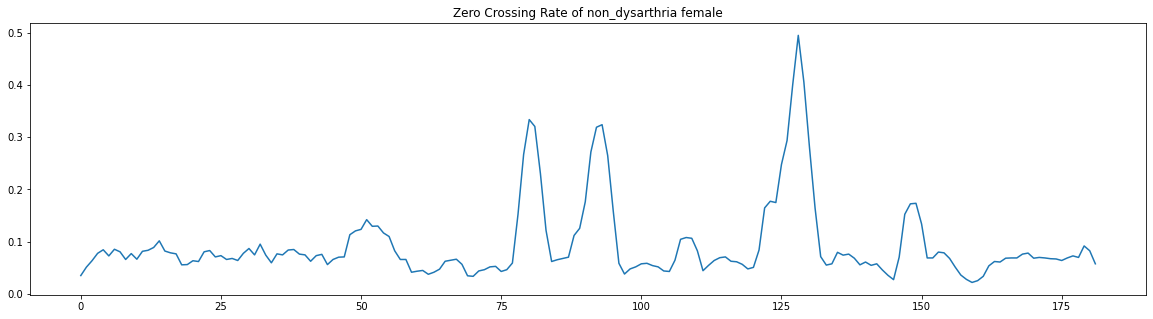

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-1.2799163e-02 -2.1679679e-07  8.2803834e-03 ...  5.4076766e-03
  6.3419286e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error


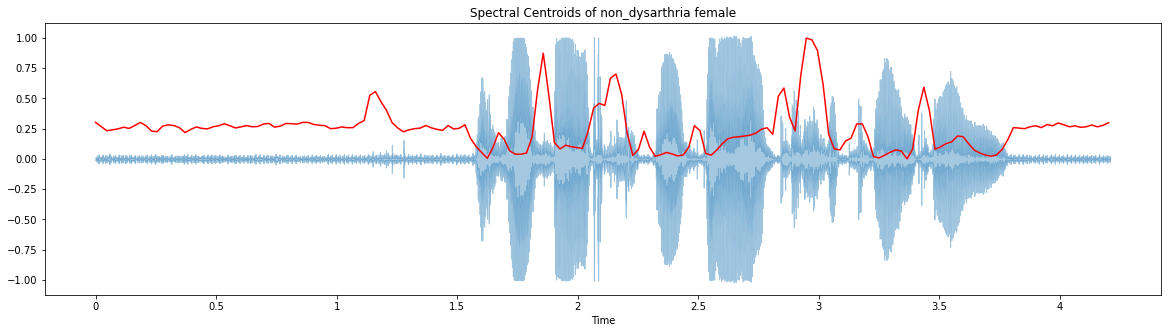

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Pass y=[-1.2799163e-02 -2.1679679e-07  8.2803834e-03 ...  5.4076766e-03
  6.3419286e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error


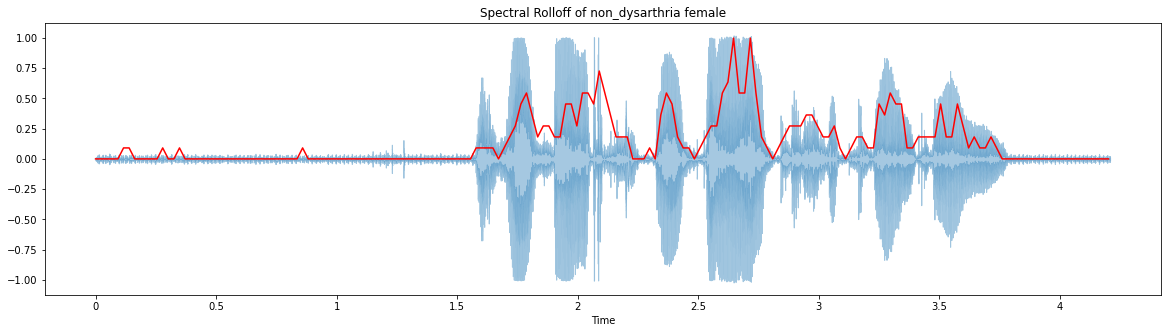

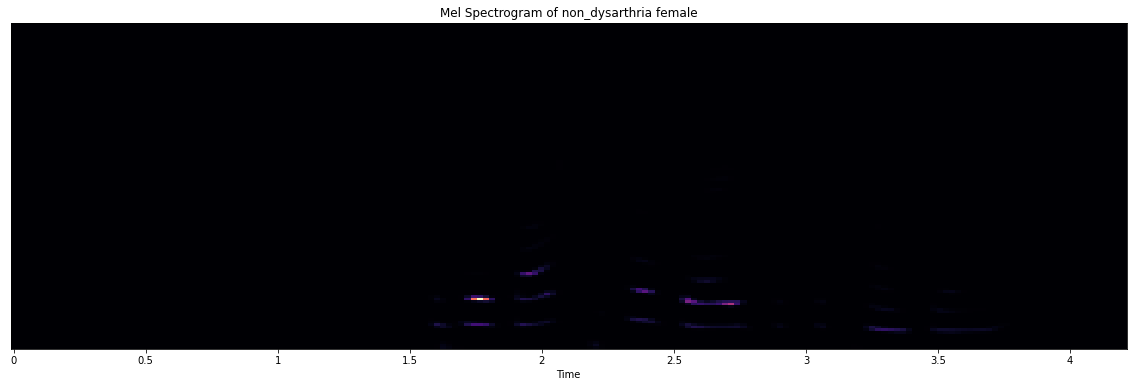

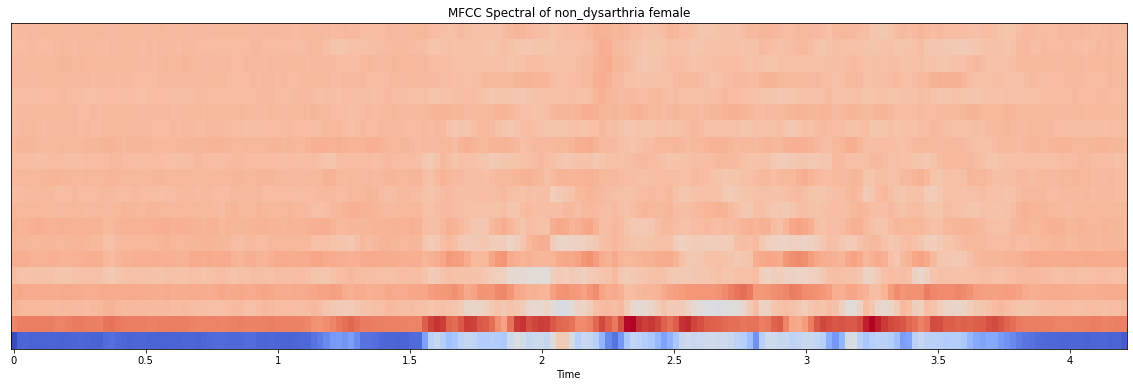

In [8]:
sample = data[(data["is_dysarthria"] == "non_dysarthria") & (data["gender"] == "female")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

#### Plots for Non Dysarthria Male

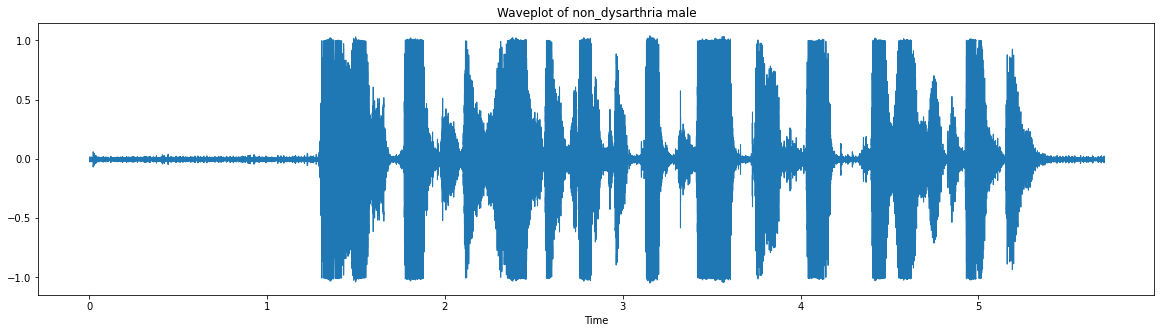

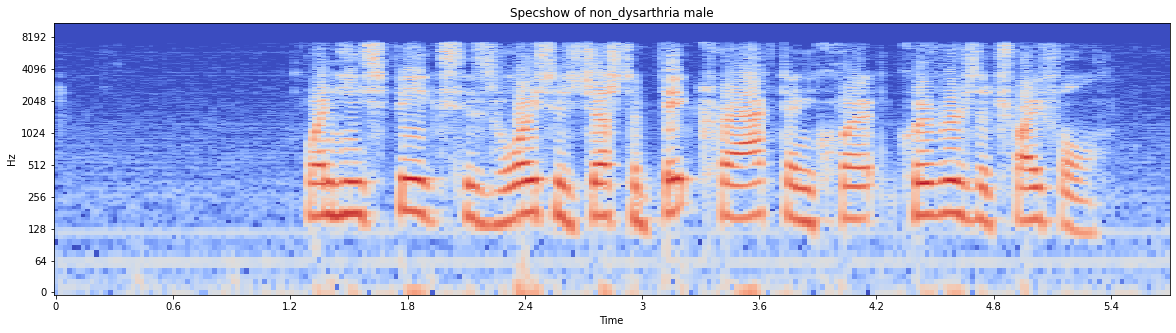

Sum of zero crossing  11634


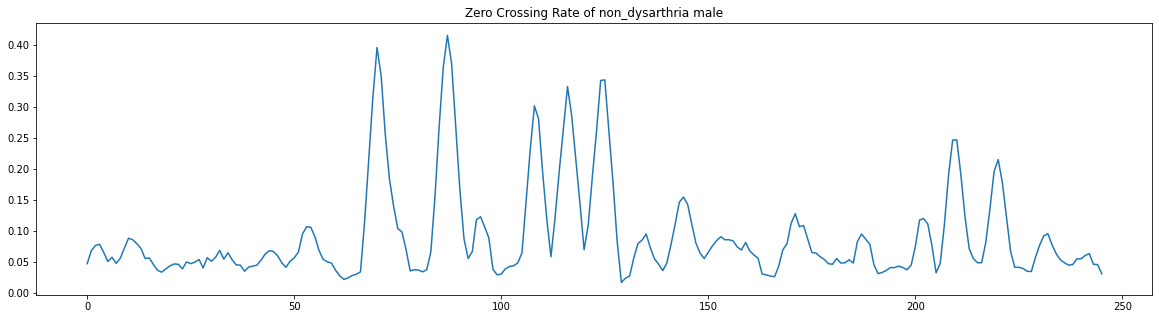

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02173448 -0.01644661 -0.01039855 ... -0.02245431 -0.01172676
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error


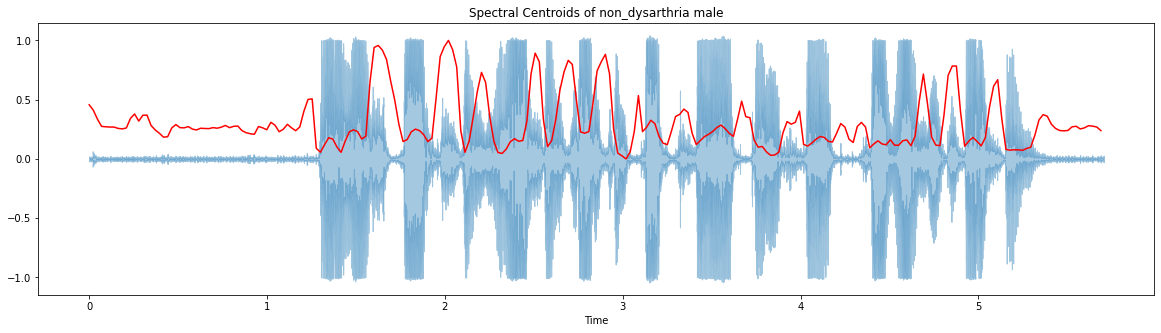

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Pass y=[-0.02173448 -0.01644661 -0.01039855 ... -0.02245431 -0.01172676
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error


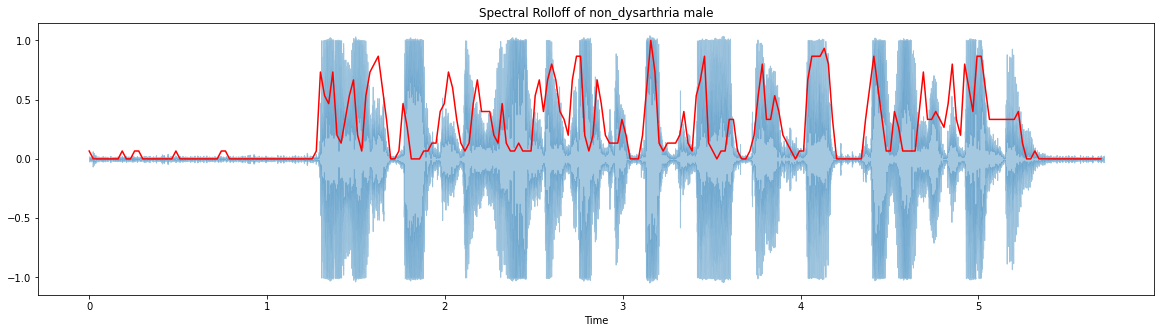

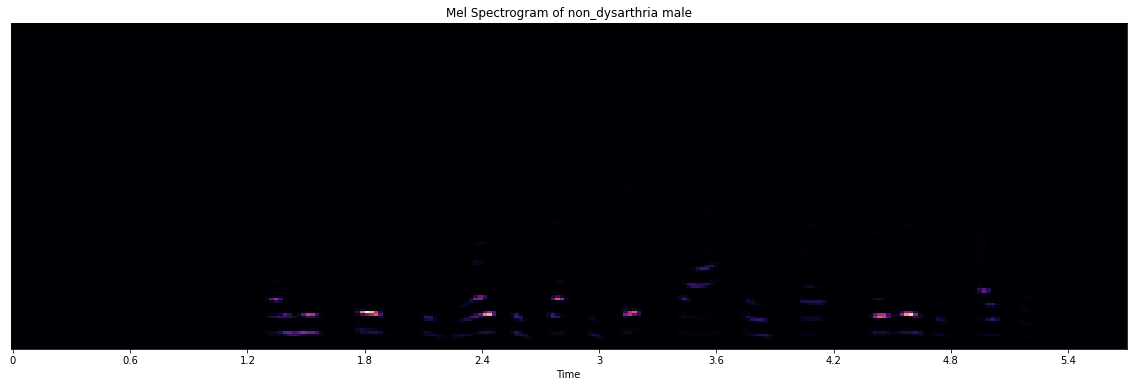

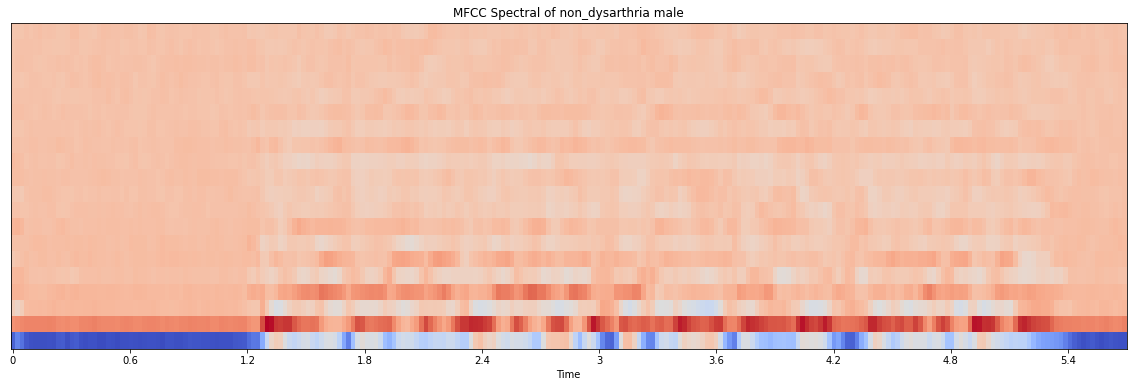

In [9]:
sample = data[(data["is_dysarthria"] == "non_dysarthria") & (data["gender"] == "male")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

#### Plots for Dysarthria Female

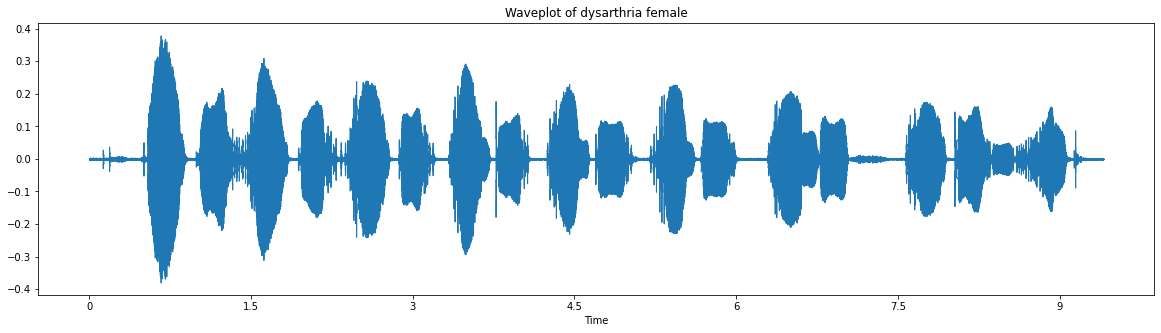

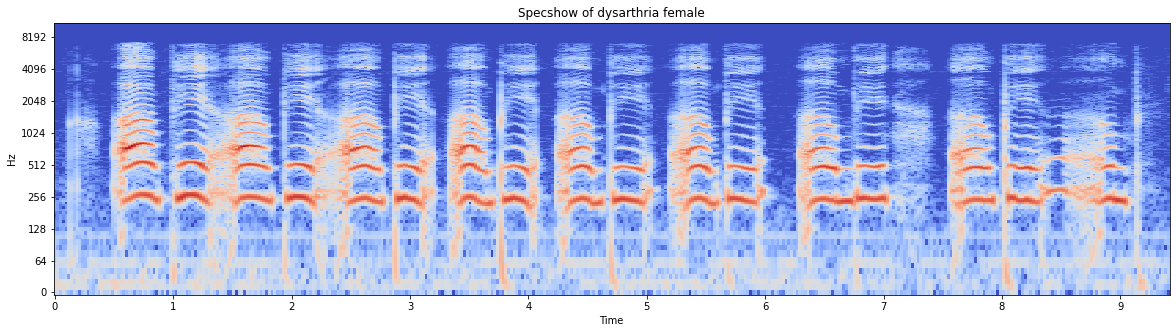

Sum of zero crossing  9205


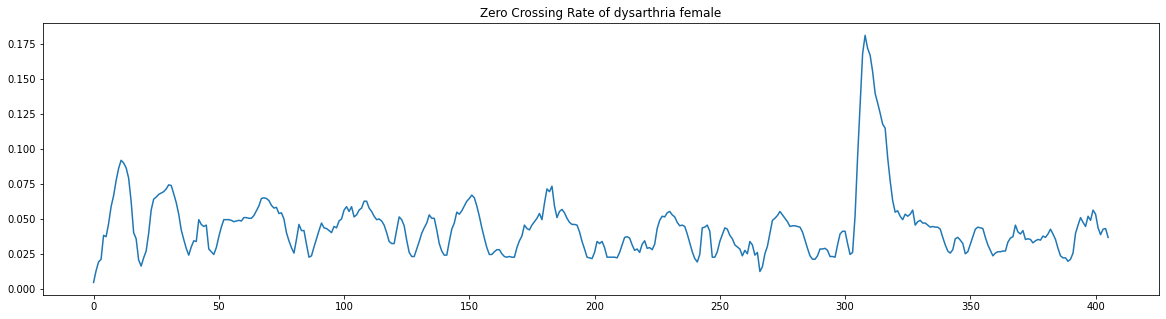

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 1.4383855e-03  2.0578019e-03  2.0007466e-03 ... -2.9632036e-04
 -8.9055975e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error


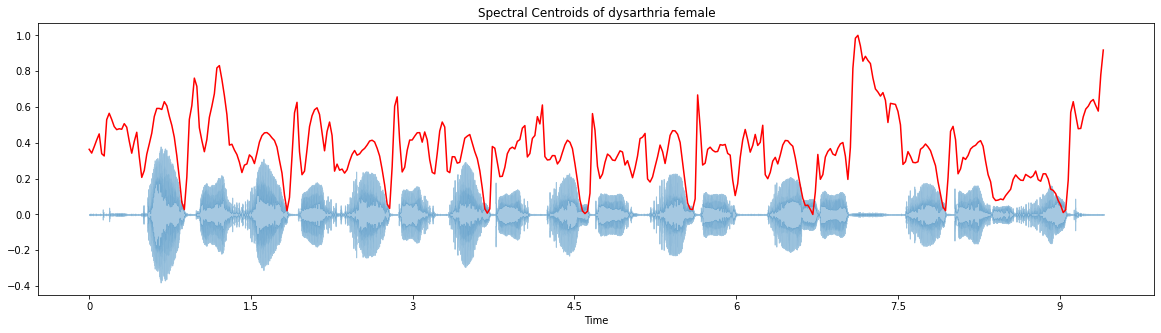

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Pass y=[ 1.4383855e-03  2.0578019e-03  2.0007466e-03 ... -2.9632036e-04
 -8.9055975e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error


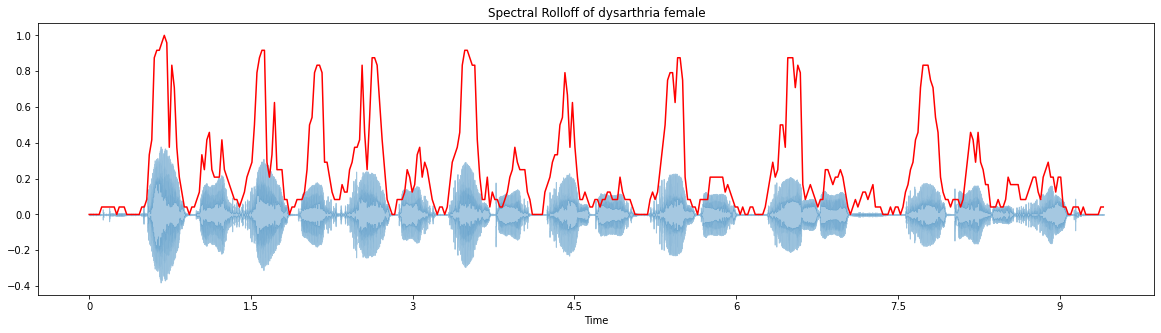

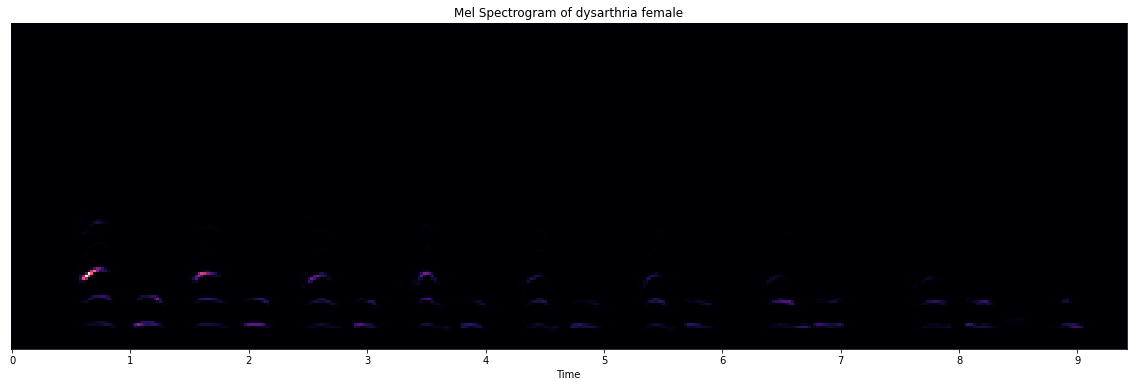

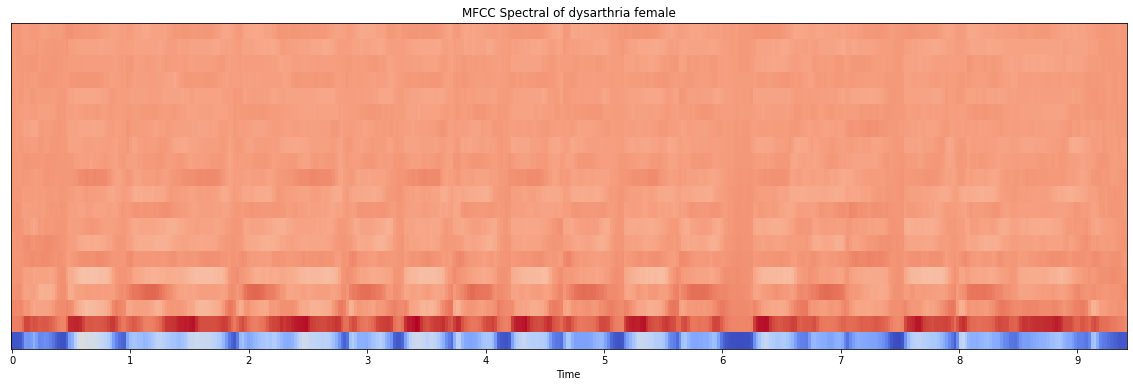

In [10]:
sample = data[(data["is_dysarthria"] == "dysarthria") & (data["gender"] == "female")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

#### Plots for Dysarthria Male

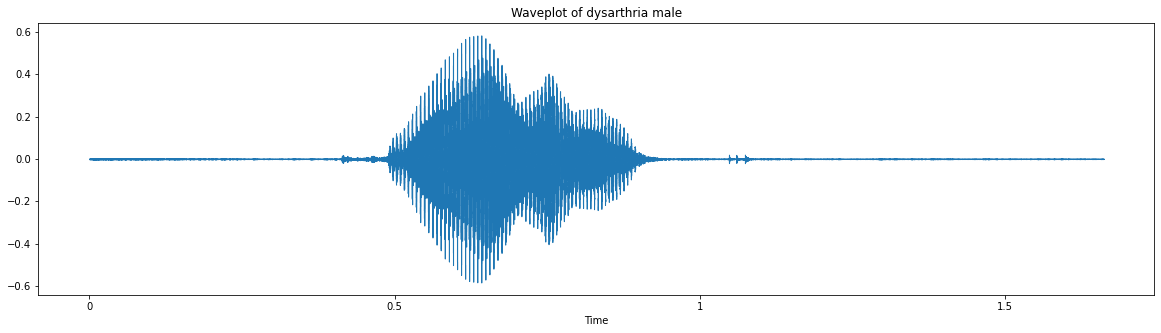

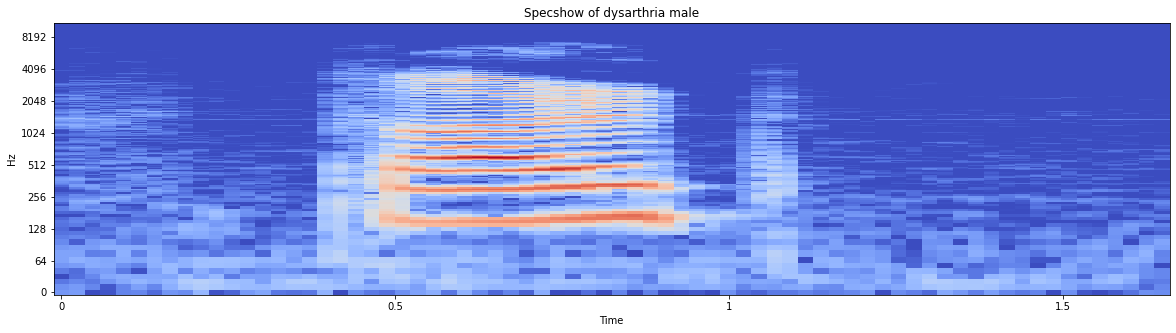

Sum of zero crossing  3111


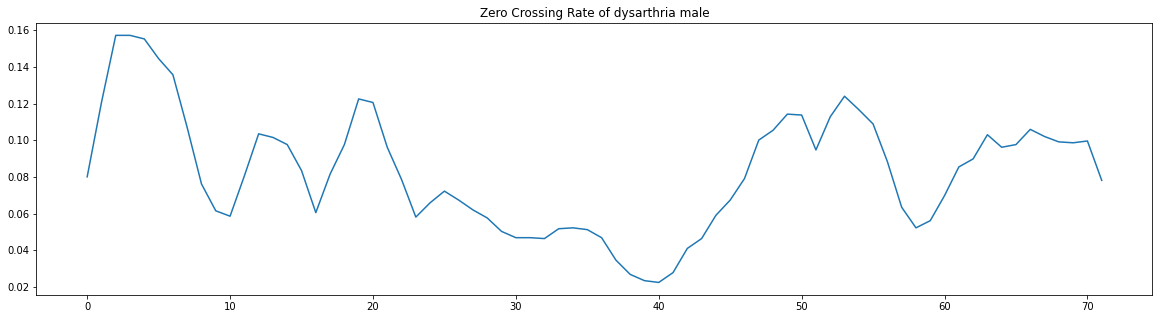

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00100133 0.00121381 0.00086274 ... 0.00047352 0.00050922 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error


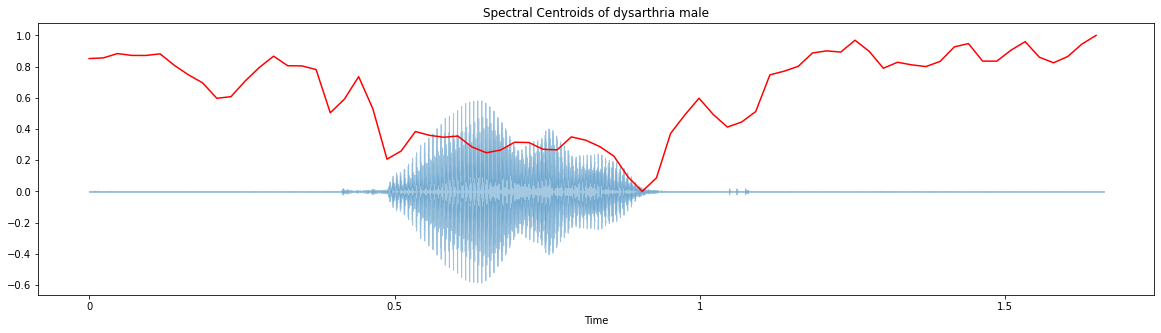

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Pass y=[0.00100133 0.00121381 0.00086274 ... 0.00047352 0.00050922 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error


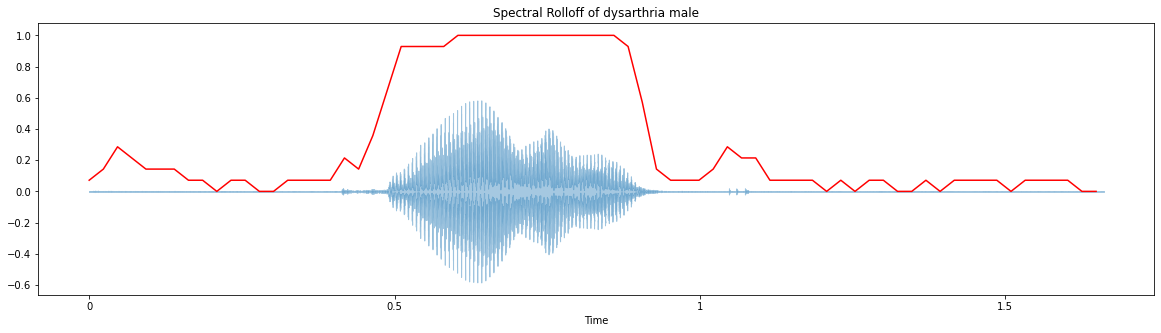

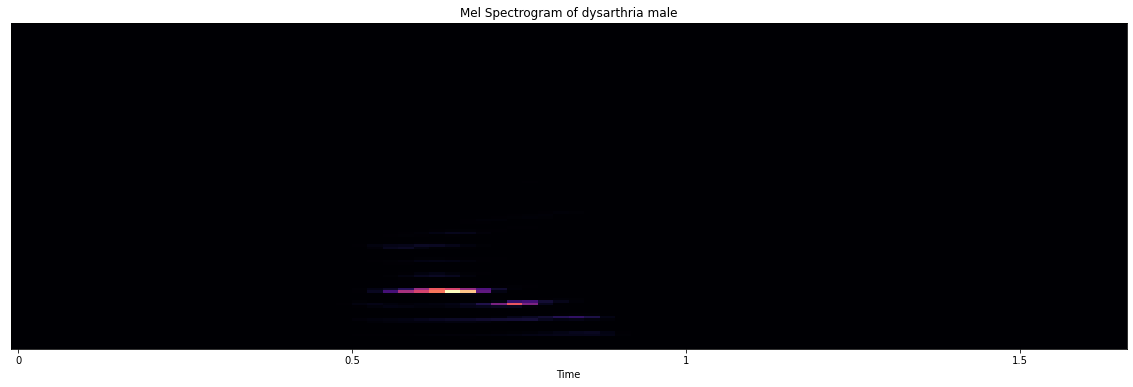

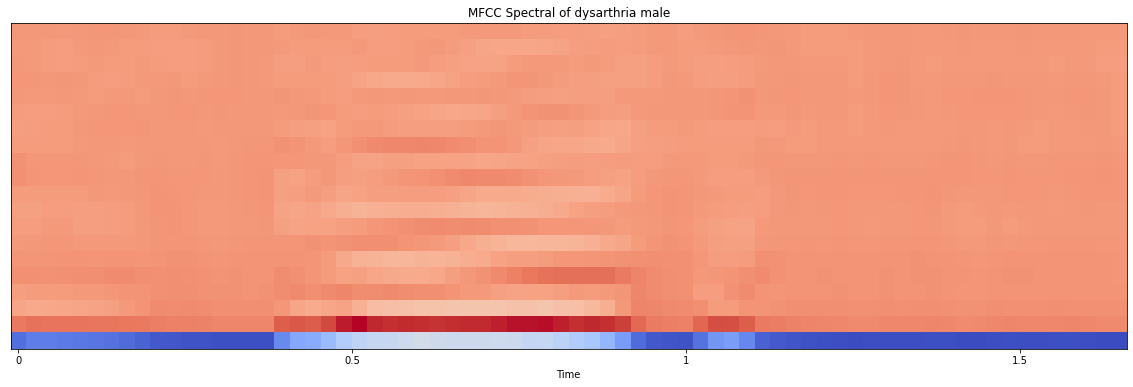

In [11]:
sample = data[(data["is_dysarthria"] == "dysarthria") & (data["gender"] == "male")]
get_feature_plot(sample['filename'].values[0], sample['is_dysarthria'].values[0], sample['gender'].values[0])
ipd.Audio(sample.filename.values[0])

**Inference: We can see there is a difference between the waveforms in dysarthria and Non dysarthria.
The waveform of person having dysarthria can be seen having pauses while non dysarthria is a continous**

### 4. Function to create MFCC features

In [12]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [13]:
%%time
X_df = pd.DataFrame(data['filename'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading audio


/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=209
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=583
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=581
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=185
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=946
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=185
  return f(*args, **kwargs)
/opt

CPU times: user 7min 13s, sys: 2min 32s, total: 9min 45s
Wall time: 9min 26s


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-222.457077,102.146935,-17.265686,38.949039,-13.736136,20.581657,-5.038507,9.669348,2.852035,-1.724100,...,1.330539,0.959738,0.782641,0.988810,0.482095,-0.025945,0.654508,0.499423,0.240431,-0.257057
1,-300.215210,110.792397,-17.835419,39.316513,-17.007551,22.735220,2.369241,17.929928,4.389093,3.490597,...,1.446290,1.091978,0.965665,1.435454,-0.224936,-1.078653,-0.329877,0.278370,-0.274176,-0.642529
2,-303.913361,113.325172,-24.710556,45.542671,-22.632982,26.017168,1.537213,17.134033,5.634882,3.570631,...,1.140907,0.793990,0.478094,1.164105,-0.163656,-1.209489,0.024640,0.433807,-0.406458,-0.485287
3,-211.974976,117.983017,-36.248325,38.447906,-27.372046,25.304882,-6.710573,11.927542,0.885225,2.587593,...,1.135721,0.547349,0.990486,0.629700,0.259464,-0.164846,0.062285,0.314661,-0.045342,-0.274535
4,-281.211090,105.812836,-18.269186,45.741081,-15.748901,27.830769,-2.712293,15.742901,5.896017,0.358894,...,1.646695,1.533421,0.922572,0.878170,0.324768,0.115258,-0.145911,-0.038609,-0.655331,-0.362039


In [14]:
X = X_df
y = data['is_dysarthria']
y = y.replace({"non_dysarthria": 0,"dysarthria":1})

In [15]:
data1 = pd.DataFrame(X_df,columns=range(0,128))
data1["class"] =y

In [16]:
data1

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-222.457077,102.146935,-17.265686,38.949039,-13.736136,20.581657,-5.038507,9.669348,2.852035,-1.724100,...,0.959738,0.782641,0.988810,0.482095,-0.025945,0.654508,0.499423,0.240431,-0.257057,0
1,-300.215210,110.792397,-17.835419,39.316513,-17.007551,22.735220,2.369241,17.929928,4.389093,3.490597,...,1.091978,0.965665,1.435454,-0.224936,-1.078653,-0.329877,0.278370,-0.274176,-0.642529,0
2,-303.913361,113.325172,-24.710556,45.542671,-22.632982,26.017168,1.537213,17.134033,5.634882,3.570631,...,0.793990,0.478094,1.164105,-0.163656,-1.209489,0.024640,0.433807,-0.406458,-0.485287,0
3,-211.974976,117.983017,-36.248325,38.447906,-27.372046,25.304882,-6.710573,11.927542,0.885225,2.587593,...,0.547349,0.990486,0.629700,0.259464,-0.164846,0.062285,0.314661,-0.045342,-0.274535,0
4,-281.211090,105.812836,-18.269186,45.741081,-15.748901,27.830769,-2.712293,15.742901,5.896017,0.358894,...,1.533421,0.922572,0.878170,0.324768,0.115258,-0.145911,-0.038609,-0.655331,-0.362039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-304.561401,115.796066,-1.147701,26.770647,-0.757051,13.096489,2.627126,3.931506,-0.938713,-3.080619,...,0.448663,0.153010,0.244165,0.094611,-0.138421,0.272110,0.265663,0.062699,-0.247763,1
1996,-458.009277,110.334679,22.025970,0.062627,-11.206986,3.119710,-4.342128,4.252670,6.066456,-2.170707,...,0.626071,0.484599,0.440195,0.401546,0.409377,0.226709,0.203481,-0.091866,0.021844,1
1997,-371.707428,117.062241,5.491239,22.597092,8.194892,7.680684,9.125202,9.802479,4.609561,3.364675,...,0.226508,-0.020404,0.015430,-0.066805,-0.199373,0.489964,0.809572,-0.329458,-0.373760,1
1998,-302.861511,112.991661,-4.898696,32.754093,-1.607929,4.021253,4.864986,9.357003,-2.490314,-3.998960,...,0.125244,-0.171940,0.354822,0.195992,-0.417778,0.448446,1.017736,-0.065310,-0.120946,1


In [17]:
data1.isna().sum().sum()

128

In [18]:
data1 = data1.dropna()

In [19]:
data1["class"].value_counts()

0    1000
1     999
Name: class, dtype: int64

In [20]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1:]

## train test split

In [21]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

In [22]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_val_scale = scaler.transform(x_val)

In [23]:
x_train = x_train_scale.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val_scale.reshape(x_val.shape[0], 16, 8, 1)

In [24]:
tf.keras.backend.clear_session()
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 16)         160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

2022-08-10 17:32:36.408911: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics='accuracy')

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=50,validation_data=(x_val,y_val),
                    callbacks=[callback])

2022-08-10 17:32:36.543884: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
57/57 [==============================] - 1s 9ms/step - loss: 0.5408 - accuracy: 0.7298 - val_loss: 0.4160 - val_accuracy: 0.8250
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3564 - accuracy: 0.8566 - val_loss: 0.3193 - val_accuracy: 0.8650
Epoch 3/50
57/57 [==============================] - 1s 9ms/step - loss: 0.2479 - accuracy: 0.9094 - val_loss: 0.2650 - val_accuracy: 0.8950
Epoch 4/50
57/57 [==============================] - 1s 11ms/step - loss: 0.1776 - accuracy: 0.9466 - val_loss: 0.2016 - val_accuracy: 0.9250
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 0.1339 - accuracy: 0.9666 - val_loss: 0.1829 - val_accuracy: 0.9300
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.9750 - val_loss: 0.1949 - val_accuracy: 0.9500
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0749 - accuracy: 0.9805 - val_loss: 0.1442 - val_accuracy: 0.9550
Epoch 8/50
57/57 [=

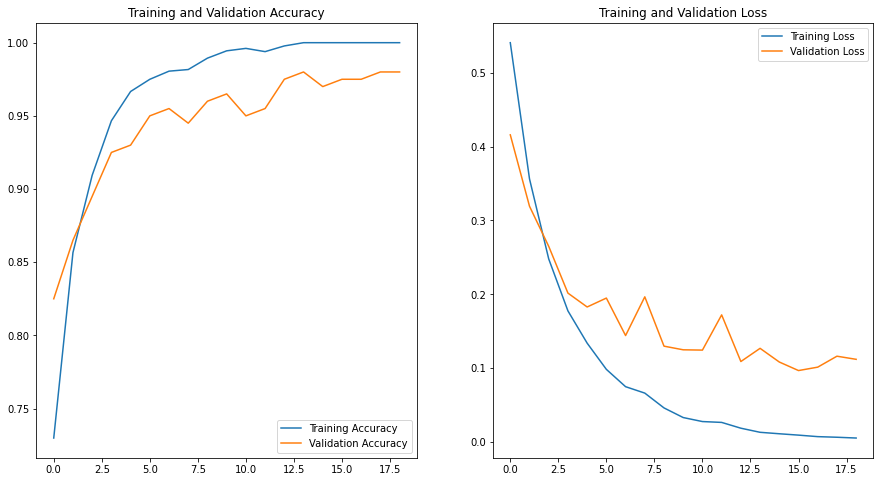

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(19)


plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model performance

training accuracy =  100.0


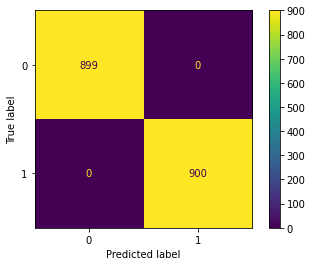

testing accuracy =  98.0


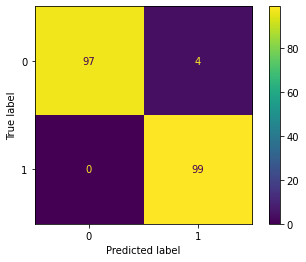

In [34]:
## prediction 
y_train_pred = np.where(model.predict(x_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(x_val) > 0.5, 1,0)
    
## Accuracy and Confusion Matrix
## training
print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)    
plt.show()
print("testing accuracy = ",accuracy_score(y_val,y_test_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_val,y_test_pred)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score,classification_report
print("train Roc_auc score = ", roc_auc_score(y_train,y_train_pred))
print("test Roc_auc score = ", roc_auc_score(y_val,y_test_pred))

train Roc_auc score =  1.0
test Roc_auc score =  0.9801980198019802


**We can se the roc score of the model is greater than 0.8 which means the model is performing very good.**

In [37]:
print("train classification report:\n ", classification_report(y_train,y_train_pred))
print("test classification report:\n\n ", classification_report(y_val,y_test_pred))

train classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       899
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1799
   macro avg       1.00      1.00      1.00      1799
weighted avg       1.00      1.00      1.00      1799

test classification report:

                precision    recall  f1-score   support

           0       1.00      0.96      0.98       101
           1       0.96      1.00      0.98        99

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



**Recall tells us out of the total TP how much was the model able to classify as TP. we see that 96% of the time non dysarthria was classified as non dysarthria and 100% of the time dysarthria is classified as dysarthria**